Calculating Sentiment Score of Reviews.csv¶

Connecting to Google Drive and obtaining the raw data of reviews

In [1]:
import glob
import pandas as pd
import numpy as np
import os
from datetime import date
today = date.today()
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from os.path import basename
from datetime import datetime, timedelta
sns.set_context("talk")
import scipy.stats as statsimport 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

In [2]:
df = pd.read_csv('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/RawDataset/reviews.csv')
# Dataset is now stored in a Pandas Dataframe

In [3]:
df.shape

(266861, 6)

Dropping Comments having NULL values

In [4]:
empty_list=[]
for i in range(len(df['comments'])):
    if type(df['comments'][i]) == float:
        empty_list.append(i)

In [5]:
df.drop(df.index[empty_list], inplace=True)

In [6]:
df.shape

(266622, 6)

In [7]:
df['comments'] = df['comments'].astype(str)

In [8]:
df.sample(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
106275,6571994,591963778,2020-01-12,34029081,Beatriz,"Anne's place is awesome. A clean cosy home, no..."
214990,23587213,653722998,2020-08-20,297370492,Elisabeth,Staying on Roel and Malou‘s boat is such a uni...
20551,690757,32532701,2015-05-19,28693512,Shan Shan,"L'appartement est très bien entretenu, chic et..."
124344,9003963,156353414,2017-05-30,396824,Tam-Anh,Very communicative and welcoming host! Lovely ...
215347,23628998,269927570,2018-05-28,187418430,Noy,A beautiful and cozy apartment. The host left ...
121891,8660698,313324646,2018-08-25,46890386,Kristina,Really a repeat of what I wrote to Mike: I pi...
113087,7382576,104059304,2016-09-25,42828595,Keith,A wonderful apartment. Hans and Patty were hel...
177585,17470838,183439591,2017-08-17,49470881,Alessandro,L'appartamento si trova in una zona tranquilla...
143262,12130964,545471408,2019-10-12,160885927,Christian,Ernst is one of a kind. The space he listed wa...
164555,15527704,329507456,2018-09-29,186258612,Sandra,Won't be disappointed. Lovely change from busy...


Sentiment Analysis: Using features of TextBlob to determine polarity and Subjectivity of a Comment¶

In [9]:
PosExample = df.loc[0,'comments']
NegExample = df.loc[528,'comments']

In [10]:
# Will be using TextBlob sentiment tool. Docs found here..
#https://textblob.readthedocs.io/en/dev/index.html
from textblob import TextBlob
print (f'Positive Example: {PosExample}')
TextBlob(PosExample).sentiment

Positive Example: Daniel is really cool. The place was nice and clean. Very quiet neighborhood. He had maps and a lonely planet guide book in the room for you to use. I didnt have any trouble finding the place from Central Station. I would defintely come back! Thanks!


Sentiment(polarity=0.14074074074074075, subjectivity=0.4592592592592593)

In [11]:
print (f'\nNegative Example: {NegExample}')
TextBlob(NegExample).sentiment


Negative Example: Very bad experience.<br/><br/>He glued the chewing gum on the pillow, And Alexander Always Late Reply, And He said he need to work, will give us the key very late when we’re coming.<br/>This guy is a joke, Do not try to Sleep here.


Sentiment(polarity=-0.3999999999999999, subjectivity=0.8116666666666668)

In [12]:
#Create function that I will apply to dataframe.
def Sentiment(CommentColumn):
    Senti = TextBlob(CommentColumn).sentiment
    polarity = Senti[0]
    subjectivity = Senti[1]
    return polarity,subjectivity

In [13]:
#apply function
df['polarity'] = pd.Series()
df['subjectivity'] = pd.Series()
for i in range(len(df['comments'])):
  Senti = TextBlob(df['comments'].iloc[i]).sentiment
  df['polarity'].iloc[i] = Senti[0]
  df['subjectivity'].iloc[i] = Senti[1]

<ipython-input-13-4212761e2a66>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['polarity'] = pd.Series()
<ipython-input-13-4212761e2a66>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['subjectivity'] = pd.Series()
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
df[['comments','polarity','subjectivity']].sample(2)

,comments,polarity,subjectivity
254334,"Appartement très bien placé, proche des lieux ...",0.000000,0.000000
108628,"Sehr sauber, super Lage wenn man viel zu Fuß g...",0.333333,0.666667


In [15]:
df[['comments','polarity','subjectivity']].sort_values(by='polarity').head(5)

,comments,polarity,subjectivity
88360,Die Unterkunft entsprach genau den Bildern. Sü...,-1.0,0.666667
20961,"Petit week-end à Amsterdam avec deux amies, De...",-1.0,1.000000
208329,L'appartement d'Emelie est très joli et bien p...,-1.0,1.000000
125494,Her behavior was terrible. no polite. and the ...,-1.0,1.000000
79260,Même si nous sommes arrivé en retard car nous ...,-1.0,1.000000


In [16]:
df[['comments','polarity','subjectivity']].sort_values(by='polarity').tail(5)

,comments,polarity,subjectivity
204804,Everything was perfect. It’s a perfect place a...,1.0,1.00
1691,The perfect host!,1.0,1.00
89132,Exclusive and excellent place to stay in Amste...,1.0,1.00
219032,It was perfect ! Thank you Marc !,1.0,1.00
159034,great location! lots of restaurants and bars n...,1.0,0.75


We will calculate sentiments of commenst which are only in English

In [17]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [18]:
from langdetect import detect

In [19]:
def detectlanguage(Comment):
    try:
        return detect(Comment)
    except:
        return "NoLang"

In [20]:
df['Language'] = pd.Series()
for i in range(len(df['comments'])):
  df['Language'].iloc[i] = detectlanguage(df['comments'].iloc[i])

<ipython-input-20-94f6e13d9b92>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Language'] = pd.Series()
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
df[(df['Language']!="en")][['comments','polarity','subjectivity','Language']].sample(4)

,comments,polarity,subjectivity,Language
92670,"Excellent séjour passé, la chambre et le logem...",1.0,1.0,fr
18715,Ein Toller Gastgeber mit vielen wertvollen Tip...,0.2,0.3,de
183201,Très agréable chambre dans un quartier légèrem...,0.0,0.0,fr
177347,estancia inmejorable,0.0,0.0,es


Filtering and storing only English comments

In [22]:
print (df.shape)
df1 = df[df['Language']=='en']
print (df1.shape)

(266622, 9)
(205892, 9)


In [23]:
df1[['comments','polarity','subjectivity']].sort_values(by='polarity').head(14)

,comments,polarity,subjectivity
159913,Worst place ever,-1.000000,1.000000
125494,Her behavior was terrible. no polite. and the ...,-1.000000,1.000000
215748,"I've forgotten something, so I'm emailing but ...",-1.000000,1.000000
166669,It's a terrible mistake to choose this place!!,-1.000000,1.000000
157052,You won't be disappointed! Book it up!,-1.000000,0.750000
243222,Too bad....<br/>It was the worst experience.,-1.000000,1.000000
94589,Terrible experience with this host.<br/>They s...,-1.000000,1.000000
209003,Very disappointed at the lack of a river view.,-0.975000,0.975000
138336,You won’t be disappointed!,-0.937500,0.750000
172950,The pictures show the place off well and if yo...,-0.937500,0.750000


In [24]:
df1[['comments','polarity','subjectivity']].sort_values(by='polarity').tail(15)

,comments,polarity,subjectivity
188048,Everything perfect,1.0,1.000
33210,It was a great stay!!!,1.0,0.750
188075,Perfect place to stay,1.0,1.000
188076,A great place to stay in Amsterdam!,1.0,0.750
139904,Very great !,1.0,0.975
259302,Alles was perfect!,1.0,1.000
139645,Perfect location!,1.0,1.000
41231,Great spot!,1.0,0.750
188115,Everything was perfect,1.0,1.000
139544,It is a wonderful room. Recommended!,1.0,1.000


Average Sentiment Score and Total Reviews for each Listing

In [25]:
Mean_Sent_Pol=df1.groupby('listing_id').mean()['polarity'].rename_axis('listing_id').reset_index(name='Mean_Sent_Pol')
Mean_Sent_Pol.head(10)

,listing_id,Mean_Sent_Pol
0,2818,0.384147
1,20168,0.360117
2,27886,0.455166
3,28871,0.447745
4,29051,0.419484
5,44391,0.397880
6,47061,0.393944
7,49552,0.433848
8,49790,0.408929
9,50523,0.449047


In [26]:
Total_Review_By_Listing=pd.DataFrame(df1['listing_id'].value_counts().rename_axis('listing_id').reset_index(name='Total_Review_By_Listing'))
Total_Review_By_Listing.sort_values(by='Total_Review_By_Listing').head(15)

,listing_id,Total_Review_By_Listing
4846,49880878,1
4631,22168849,1
4632,51501124,1
4633,41466832,1
4634,48004872,1
4635,27287775,1
4636,40044862,1
4637,35145947,1
4638,45314111,1
4639,12548328,1


Merging Total Review and Average Sentiment Score to Concise_Review

In [27]:
concise_review=pd.merge(Mean_Sent_Pol,Total_Review_By_Listing,on ='listing_id')

In [28]:
concise_review.head()

,listing_id,Mean_Sent_Pol,Total_Review_By_Listing
0,2818,0.384147,238
1,20168,0.360117,282
2,27886,0.455166,184
3,28871,0.447745,271
4,29051,0.419484,451


Retrieving the concise_review.csv dataset

In [29]:
concise_review.to_csv('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/Intermediate/sent_review.csv',index=False)

Checking the Distribution of Average Sentiment Score

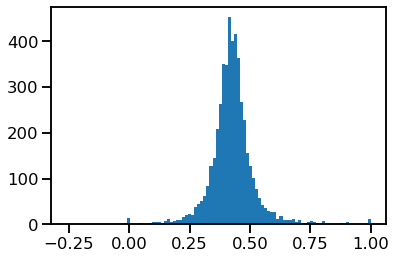

In [30]:
plt.hist([concise_review.Mean_Sent_Pol],bins=100)
plt.show()